# Final Project Submission: Real Estate Linear Regression Model Analysis
__(Phase 2)__

* Student Name: Tenicka Norwood
* Program Pace: self paced
* Scheduled Project Review Time: 
* Instructor name: Joe Comeaux
* Blog post Url:https://medium.com/@tenicka.norwood/working-with-data-while-trying-to-stay-dry-fa4ebf5e5f64



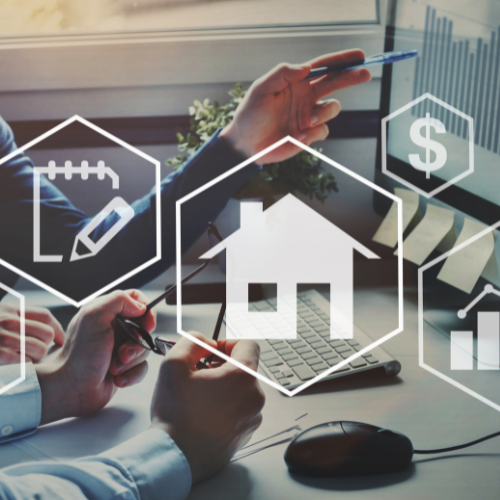
Photo by: anyaberkut on [Canva](https://www.canva.com)


# Overview:
LandingPad Realtors is a real estate business that helps families with school-aged children relocate to King County and find the perfect home to meet their families needs. LandingPad provides potential homeowners with home purchase options within their ideal budget. 

For this project, I will start by identifying the characteristics of homes that increase housing costs. The effect of each relevant feature will then be identified and communicated to the team at LandingPad. This project will be grounded in performing a statistical analysis of the price of houses in the King County House dataset and creating a multiple linear regression model that accurately predicts the sale price of a house in King County.

Linear Regression is often described as a predictive model based on the sum of weighted independent variables. This mathematical linear relationship between an dependent variable and one or more dependent varibles and is often shown as:

$$
    y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... \beta_nx_n
$$

where $\beta_0$ is a constant that shows the y-intercept and $\beta_1$ to $\beta_n$ are coefficients that show how the dependent variable y changes with the independent variables $x_1$ to $x_n$.



# Business Understanding

* __Stakeholder__: LandingPad Realtors
* __Busines Case__: I have been hired by LandingPad to accurately predict the housing prices within the King County Housing Market. Executives at LandingPad want to launch a multimedia campaign to reach their target audience of young families moving to the Kings County Area and want a reliable model that can be refined over time as more information becomes available. 



# Objectives

We will use the CRISP DM model to:

* Understand the Data 
    - Examine and document surface properties of the data
    - Dig deeper into the data to visualize and identify relationships among the data
* Prepare the Data 
    - Select, clean, construct, integrate and format data
* Model the Data 
    - Determine which algorithm to try
* Evaluate the Model 
    - Determine if the model meets the business success criteria and determine next steps
    
Then, I will use this to build and refine a __linear regression model__ that I can use to answer the following guiding questions: 

1. __Which neighborhoods have the highest average home price?__ 
<br>Understanding the effect of neighborhood location on home price is key information for potential home owners and realtors</br>
2. __How does the number of bedrooms affect the sale price of a home?__
<br>Insights on the affect of attributes on the sale price can help new home owners budget appropriately</br>
3. __How does proximity to a highly rated school affect the sale price of a home?__
<br>Knowing which homes are connected to highly rated schools is vital information for families with school aged children.</br>

The recommendations garnered by answering these questions will be valuable to LandingPad Realtors because they will help prospective home buyers confidently determine which homes yield the best options within their price range.

# Data Understanding

In this project I will use the CRISP DM method. 
The dataset selected in this project are from the :

* King County House Sales Dataset found in <code>kc_house_data.csv</code>

The dataset can be found in the data folder of this repository along with a file called <code>column_names.md</code> which provides description of the features within the dataset. More information about the features on the site of [the King County Assessor.](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

The King County House Sales Dataset includes sales data for 21,597 homes with 20 features:

| Name               | Description                 |Final Datatype|Numeric or Categorical|Target or Feature|
|--------------------|-----------------------------|---------|-------------------------|------------|
| <code>id</code>    |Unique identifier for a house| <code>int</code>|Numeric|Feature|
|<code>date</code>| Date house was sold|<code>datetime</code>|Numeric|Feature|
| <code>price</code>|Sale price (__prediction target__)|<code>int</code>| Numeric|Target|
| <code>bedrooms</code>|Number of bedrooms|<code>int</code>|Numeric|Feature|
| <code>bathrooms</code>|Number of bathrooms|<code>float</code>|Numeric|Feature|
| <code>sqft_living</code>|Square footage of living space in the home|<code>int</code>|Numeric|Feature|
| <code>sqft_lot</code>|Square footage of the lot|<code>int</code>|Numeric|Feature|
| <code>floors</code>|Number of floors(levels) in house|<code>float</code>|Numeric|Feature|
| <code>waterfront</code>|Whether the house is on a waterfront|<code>float</code>|Categorical|Feature|
| <code>view</code>|  Quality of view from house|<code>float</code>|Categorical|Feature|
| <code>condition</code>|How good the overall condition of the house is. Related to the maintenance of house|<code>int</code>|Numeric|Feature| 
| <code>grade</code>|Overall grade of the house. Related to the construction and design of the house|<code>int</code>|Categorical|Feature|
| <code>sqft_above</code>| Square footage of house apart from basement|<code>int</code>|Numeric|Feature|
| <code>sqft_basement</code>| Square footage of the basement|<code>float</code>|Numeric|Feature|
| <code>yr_built</code>|Year when house was built|<code>int</code>|Numeric|Feature|
| <code>yr_renovated</code>|Year when house was renovated|<code>int</code>|Numeric|Feature|
| <code>zipcode</code>| ZIP Code used by the United States Postal Service|<code>int</code>|Categorical|Feature|
| <code>lat</code>|Latitude coordinate|<code>float</code>|Numeric|Feature|
| <code>long</code>| Longitude coordinate|<code>float</code>|Numeric|Feature|
| <code>sqft_living15</code>| The square footage of interior housing living space for the nearest 15 neighbors|<code>int</code>|Numeric|Feature|
| <code>sqft_lot15</code>|The square footage of the land lots of the nearest 15 neighbors|<code>int</code>|Numeric|Feature|

## Data Preparation

## Import libraries and Visualization Packages
Importing libraries at the beginning allows access to modules and other tools throughout this project that help to make the tasks within this project manageable to implement. The main libraries that will be used within this project include:

* <code>pandas</code>: a data analysis and manipulation library which allows for flexible reading, writing, and reshaping of data
* <code>numpy</code>: a key library that brings the computationaly power of languages like C to Python
* <code>matplotlib</code>: a comprehensive visualization library
* <code>seaborn</code>: a data visualization library based on matplotlib

In [1]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings

# Hide warnings
warnings.filterwarnings('ignore')

# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Used for working with the z-score 
from scipy import stats

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)



## Load Data Using Pandas
Read in data from  <code>kc_house_data.csv</code> using <code>.read_csv()</code> from the pandas library.

In [2]:
# Read Data from Kings County House Data
df = pd.read_csv('data/kc_house_data.csv', index_col = 0)

Let's look at the first five rows of the Kings County Housing Data.

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


### Clean the Data

In order to clean the data, I typically address missing data, place holders and datatypes. This is the most important step of this project because if data is not appropriate for the model, the results will be inherently inaccuarate and my model will result in lackluster predictions. 

To dig deeper into the data, I will:
* Review the datatypes found within the entire dataframe
* Address duplicates, missing and placeholder data
* Address incorrect or incongruous datatypes for the model

### Review Datatypes within Data Frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

### Address duplicates, missing and placeholder data

In [5]:
# Check for placeholders throughout the entire dataframe
df.isin(['?', '#', 'NaN', 'null', 'N/A', '-']).any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [6]:
# Convert sqft_basement to float
# Replace placeholder ? to NAN values
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors="coerce")

In [7]:
# Check for placeholders throughout the entire dataframe
df.isin(['?', '#', 'NaN', 'null', 'N/A', '-']).any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Let's look at the columns within the <code>pandas</code> dataframe.

In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

This dataset has 20 columns with 21597 rows of data. The waterfront, view, condition, grade, sqft_basement and date are object datatypes. 

Let's check which columns contain null values.

In [9]:
df.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Address incorrect or incongruous datatypes for the model

Let's convert the date from a string to a datetime object. 

In [10]:
# Convert data column in the dataframe to datetime
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipco

In [12]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,Average,7 Average,1180,0.00,1955,0.00,98178,47.51,-122.26,1340,5650
6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,NO,NONE,Average,7 Average,2170,400.00,1951,1991.00,98125,47.72,-122.32,1690,7639
5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,NO,NONE,Average,6 Low Average,770,0.00,1933,nan,98028,47.74,-122.23,2720,8062
2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,NO,NONE,Very Good,7 Average,1050,910.00,1965,0.00,98136,47.52,-122.39,1360,5000
1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,NO,NONE,Average,8 Good,1680,0.00,1987,0.00,98074,47.62,-122.05,1800,7503


From our check, the waterfront column has 2376 null values. The view column has 63 null values and the yr_renovated column has 3842 null values. 

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21143.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,291.85,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,442.50,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [14]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [15]:
#for col in categoricals:
#    print(df[col].value_counts(), "\n")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   view           21534 non-null  object        
 9   condition      21597 non-null  object        
 10  grade          21597 non-null  object        
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21143 non-null  float64       
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   17755 non-null  float64       
 15  zipco

Next I will impute missing values in the dataframe. I replaced <code>waterfront</code>,<code>sqft_basement</code> and <code>view</code> null values with 0 and replace <code>yr_renovated</code> null values with the <code>yr_built</code>.

In [17]:
df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [18]:
df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
df["zipcode"].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [20]:
df["waterfront"].fillna(0, inplace = True)
df["sqft_basement"].fillna(0, inplace = True)
df["view"].fillna(0, inplace = True)
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [21]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].nunique()))

date : 372
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 3
view : 6
condition : 5
grade : 11
sqft_above : 942
sqft_basement : 303
yr_built : 116
yr_renovated : 117
zipcode : 70
lat : 5033
long : 751
sqft_living15 : 777
sqft_lot15 : 8682


Now let's check to see if there are any null values in any of the columns of our dataframe.

In [22]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
df['yr_renovated'] = df['yr_renovated'].astype('int64')

Great, now let's check out the correlation of features within my dataframe.

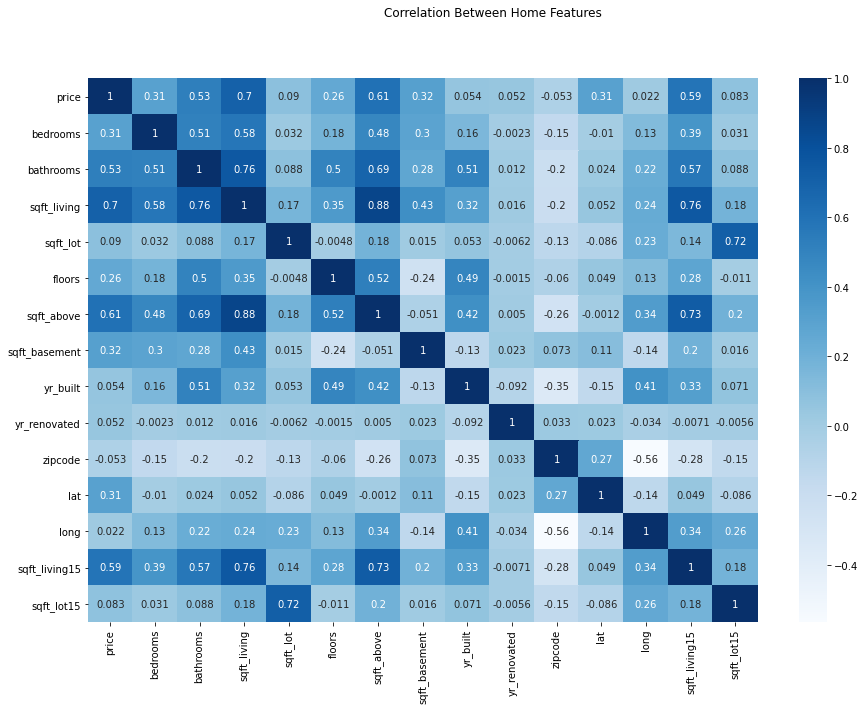

In [24]:
# Review correlations on filtered dataset
plt.figure(figsize = (15,10)).suptitle("Correlation Between Home Features")
sns.heatmap(df.corr(), annot = True, cmap = "Blues");

The correlation shown is called a Pearson correlation and is given by the ratio below:

$$
r = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2}\sqrt{\sum(y_i-\bar{y})^2}}
$$

A commonly held rule for interpreting the Pearson correlation is that:
* Very Strong Correlation &rarr; 0.8 to 1
* Strong Correlation &rarr;  0.6 to 0.799
* Moderate Correlation &rarr; 0.4 to 0.599
* Weak Correlation &rarr; 0.2 to 0.399
* Very Weak Correlation &rarr; 0 to 0.199

From the heatmap, it appears that house <code>price</code>(the target) has the __strongest correlation__ with <code>sqft_living</code> (0.7), a weak correlation with floors <code>floors</code>(0.26),a __strong correlation__ with <code>sqft_above</code>(0.61), a weak correlation with <code>lat</code>(0.31) and a moderate correlation with <code>sqft_living_15</code>(0.59). The <code>sqft_living</code>, <code>bathrooms</code>, <code>sqft_above</code> and <code>sqft_living_15</code> features all seem to be highly correlated (> 0.7) to one another as well. This will be helpful when building our baseline model and refining it after reviewing our metrics.

Let's spend some time exploring the data. First let's visualize target using <code>seaborn</code>.

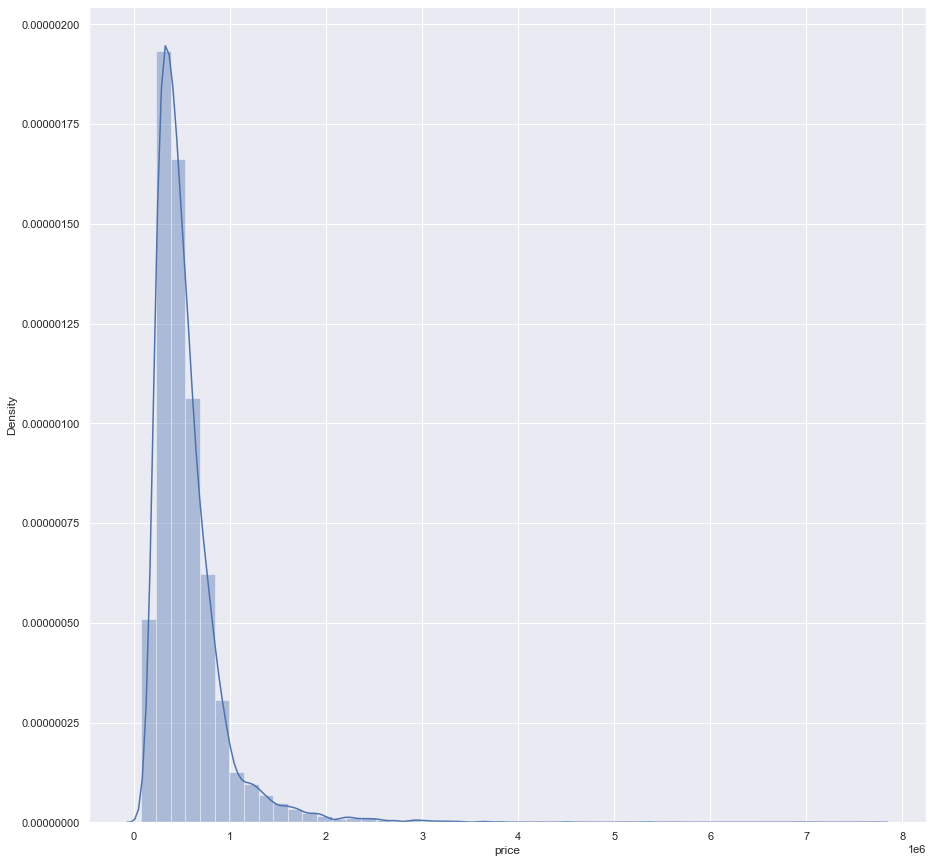

In [25]:
sns.set(rc={'figure.figsize':(15,15)})
sns.distplot(df['price'])
plt.ticklabel_format(style='plain', axis= 'y')
plt.show()

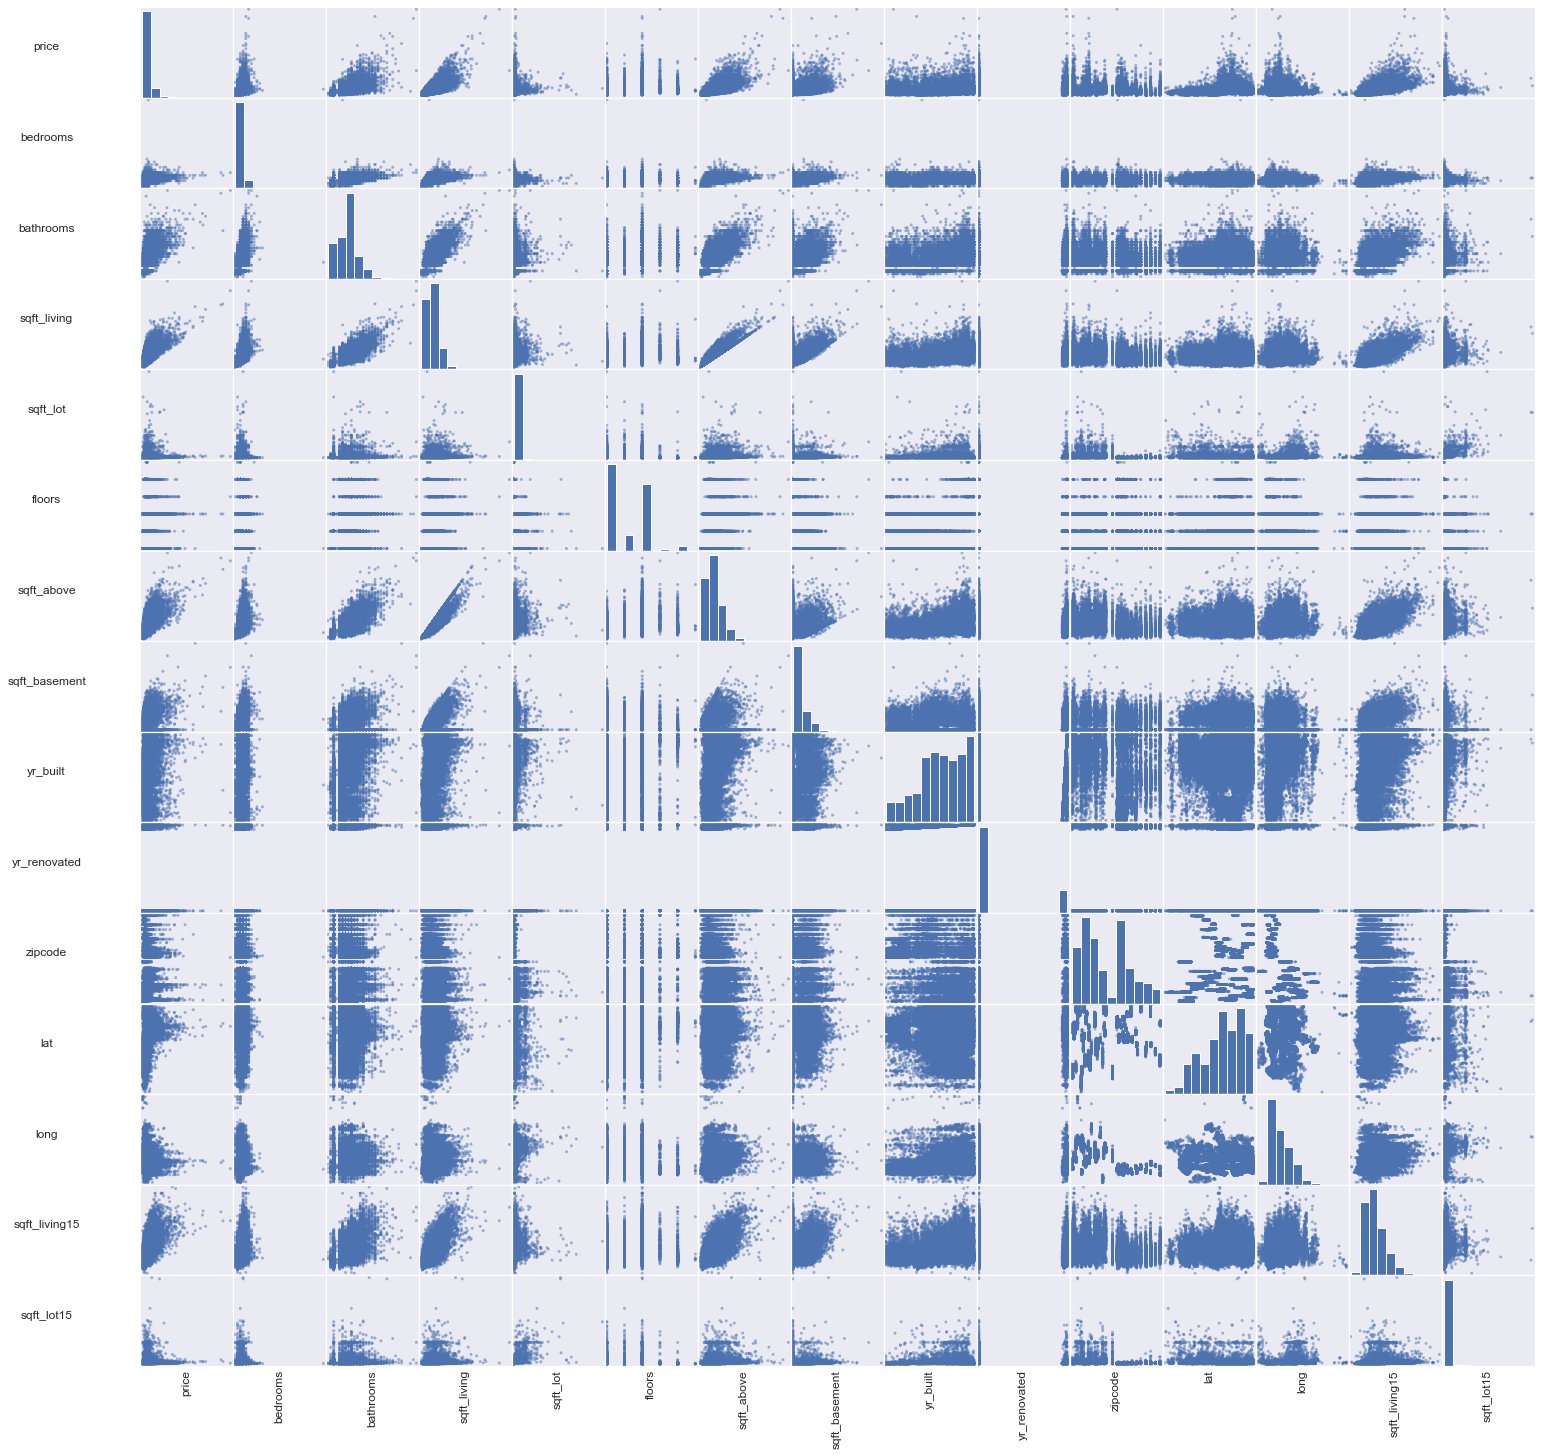

In [26]:
scatter_plot = pd.plotting.scatter_matrix(df, figsize=[25, 25]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in scatter_plot.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scatter_plot.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in scatter_plot.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in scatter_plot.reshape(-1)]
[s.set_yticks(()) for s in scatter_plot.reshape(-1)]

plt.show()

In [27]:
# Identify the name of the predictor column with strongest correlation
most_correlated = 'sqft_living'

In [28]:
df_subset = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',  'lat']]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Square Ft of Living Space vs Price'}, xlabel='sqft_living', ylabel='price'>

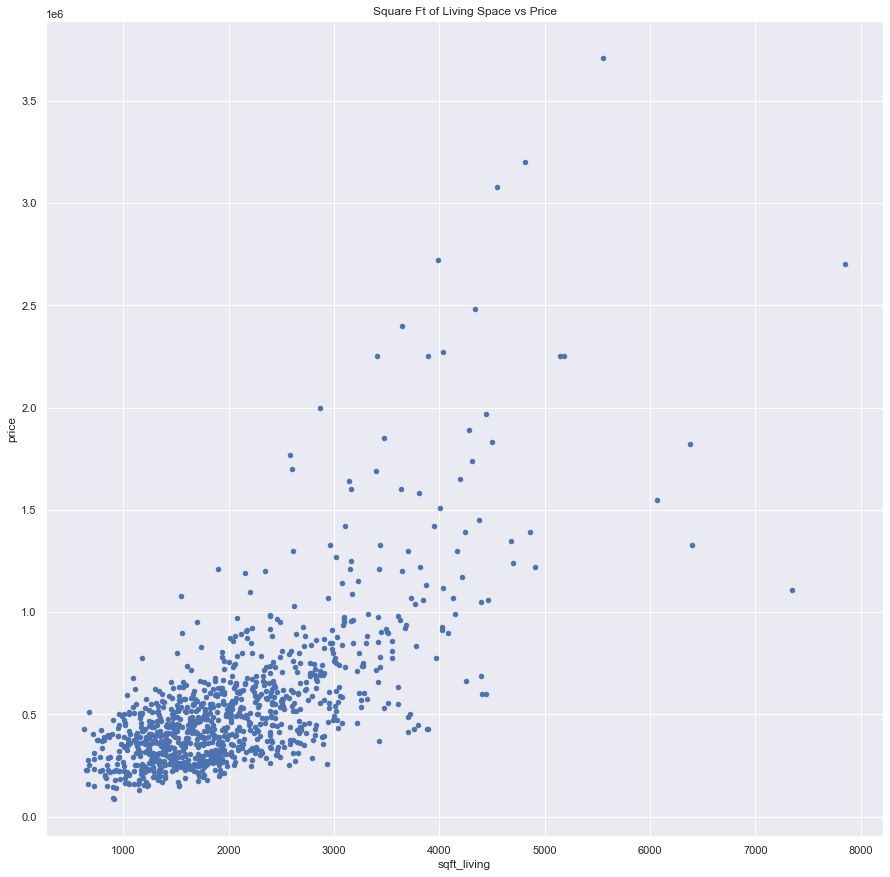

In [29]:
## Plotting the Most Correlated Predictor vs Price

# Plot a sampel of 1000 data points, most_correlated vs. price
df_subset.sample(1000, random_state = 1).plot.scatter(x = most_correlated, y = 'price', title = 'Square Ft of Living Space vs Price')

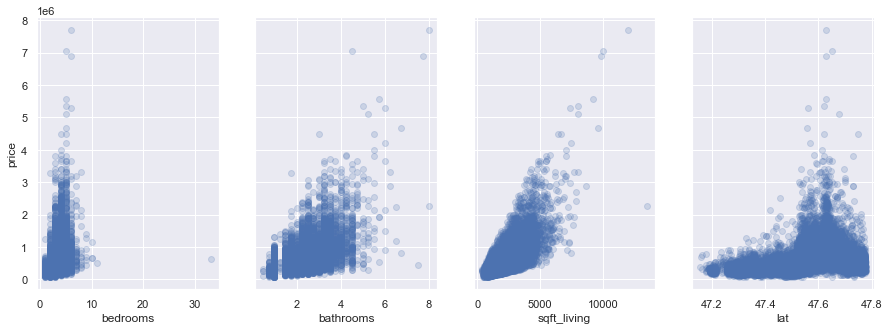

In [30]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=4, figsize=(15,5), sharey=True)
axes[0].set_ylabel("price")

for i, col in enumerate(df_subset.drop("price", axis=1).columns):
    ax = axes[i]
    ax.scatter(df_subset[col], df_subset["price"], alpha=0.2)
    ax.set_xlabel(col)

# Build a Simple Linear Regression model

First, I will set the dependent variable (<code>y</code>) to be the <code>price</code>.  Next I will choose the most highly correlated features from the dataframe to be the baseline independent variable (<code>X</code>). 
Afterwards, I will:
* Build a linear regression using <code>statsModels</code>
* Describe the overall model performance 
* Interpret its coefficients. 

In [31]:
# Explore correlation to find a good starting point
df_subset.corr()['price'].sort_values()

lat           0.31
bedrooms      0.31
bathrooms     0.53
sqft_living   0.70
price         1.00
Name: price, dtype: float64

In [32]:
# Set price as the dependent variable 
y = df_subset["price"]

In [33]:
# sqft_living had the highest correlation
X_baseline = df_subset[[most_correlated]]

## Creating and Fitting Simple Linear Regression

In [34]:
import statsmodels.api as sm
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

# Evaluate and Interpret Baseline  Model Results

In [35]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:39:20   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

My model is statistically significant overall, and explains __49.3% of the variance in house price__.
Both our intercept and our coefficient for <code>sqft_living</code> are statistically significant. 

My intercept is a small negative number, meaning a home with 0 square feet of living would cost around ~$0. 

My coefficient for <code>sqft_living</code> is about 280, which means that for each additional square foot of living space, 
I expect the price to increase about __$280__.

# Prepare Categorical Features for Multiple Regression Modeling


In [36]:
df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
0               63
Name: view, dtype: int64

In [37]:
df_updated = df[['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long', "grade", "view", "zipcode", "waterfront"]]
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21597 non-null  int64  
 1   bathrooms    21597 non-null  float64
 2   sqft_living  21597 non-null  int64  
 3   lat          21597 non-null  float64
 4   long         21597 non-null  float64
 5   grade        21597 non-null  object 
 6   view         21597 non-null  object 
 7   zipcode      21597 non-null  int64  
 8   waterfront   21597 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


In [38]:
# Create a new data frame with view dummy variables
df_with_dummies = pd.get_dummies(data = df_updated, columns = ["view", "zipcode", "grade", "waterfront"], drop_first = True)


In [39]:
df_with_dummies.head()

,bedrooms,bathrooms,sqft_living,lat,long,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,...,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,waterfront_NO,waterfront_YES
id,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,47.51,-122.26,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6414100192,3,2.25,2570,47.72,-122.32,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5631500400,2,1.00,770,47.74,-122.23,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2487200875,4,3.00,1960,47.52,-122.39,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1954400510,3,2.00,1680,47.62,-122.05,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [40]:
y_1 = df["price"]

In [41]:
y_1

id
7129300520   221900.00
6414100192   538000.00
5631500400   180000.00
2487200875   604000.00
1954400510   510000.00
                ...   
263000018    360000.00
6600060120   400000.00
1523300141   402101.00
291310100    400000.00
1523300157   325000.00
Name: price, Length: 21597, dtype: float64

In [42]:
iterated_model = sm.OLS(y_1, sm.add_constant(df_with_dummies))
iterated_results = iterated_model.fit()

In [43]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1137.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:39:21   Log-Likelihood:            -2.8839e+05
No. Observations:               21597   AIC:                         5.770e+05
Df Residuals:                   21505   BIC:                         5.777e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.153e+07   5

## Remove the values with high p-values

In [44]:
revised_df = df_with_dummies.drop(["view_AVERAGE", "view_FAIR", "zipcode_98002"
                                   , "zipcode_98003", "zipcode_98011", "zipcode_98014"
                                   ,"zipcode_98077","zipcode_98028","zipcode_98030"
                                   ,"zipcode_98031", "zipcode_98032", "zipcode_98042"
                                   ,"zipcode_98055", "zipcode_98058", "zipcode_98077", "zipcode_98188"
                                   , "zipcode_98148","zipcode_98168","zipcode_98092","zipcode_98198"
                                   ,"zipcode_98070","grade_3 Poor","waterfront_NO", "long"], axis = 1)

In [45]:
revised_model = sm.OLS(y_1, sm.add_constant(revised_df))
revised_results = revised_model.fit()

In [46]:
print(revised_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1520.
Date:                Wed, 30 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:39:21   Log-Likelihood:            -2.8841e+05
No. Observations:               21597   AIC:                         5.770e+05
Df Residuals:                   21528   BIC:                         5.775e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -1.44e+07   7

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
baseline_results.rsquared_adj, revised_results.rsquared_adj

(0.492664406931022, 0.8270576282991065)

# Insights

# Recommendations